DATA COLLECTION

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/mail_data.csv")

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df = df.drop_duplicates()

In [5]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")
profile.to_file("mail_data_report.html")

c:\Users\AJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 250.05it/s]


TEXT PROCESSING

In [6]:
import spacy

# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

# Define functions for processing
def tokenize(text):
    doc = nlp(text)
    return [token.text for token in doc]

def lemmatize(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc]

def remove_stopwords(text):
    doc = nlp(text)
    return [token.text for token in doc if not token.is_stop]

# Apply to the whole dataset (replace 'Message' with your actual column name if different)
df['tokens'] = df['Message'].apply(tokenize)
df['lemmas'] = df['Message'].apply(lemmatize)
df['filtered_tokens'] = df['Message'].apply(remove_stopwords)

# Display the first few rows to check the results
# df[['Message', 'tokens', 'lemmas', 'filtered_tokens']].head()
df

,Category,Message,tokens,lemmas,filtered_tokens
0,ham,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail...","[go, until, jurong, point, ,, crazy, .., avail...","[jurong, point, ,, crazy, .., Available, bugis..."
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]","[ok, lar, ..., joke, wif, u, oni, ...]","[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, ..., U, c, alrea...","[u, dun, say, so, early, hor, ..., u, c, alrea...","[U, dun, early, hor, ..., U, c, ...]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, do, n't, think, he, goes, to, usf, ,,...","[Nah, I, do, not, think, he, go, to, usf, ,, h...","[Nah, think, goes, usf, ,, lives]"
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,"[This, is, the, 2nd, time, we, have, tried, 2,...","[this, be, the, 2nd, time, we, have, try, 2, c...","[2nd, time, tried, 2, contact, u., U, won, £, ..."
5568,ham,Will ü b going to esplanade fr home?,"[Will, ü, b, going, to, esplanade, fr, home, ?]","[will, ü, b, go, to, esplanade, fr, home, ?]","[ü, b, going, esplanade, fr, home, ?]"
5569,ham,"Pity, * was in mood for that. So...any other s...","[Pity, ,, *, was, in, mood, for, that, ., So, ...","[pity, ,, *, be, in, mood, for, that, ., so, ....","[Pity, ,, *, mood, ., ..., suggestions, ?]"
5570,ham,The guy did some bitching but I acted like i'd...,"[The, guy, did, some, bitching, but, I, acted,...","[the, guy, do, some, bitching, but, I, act, li...","[guy, bitching, acted, like, interested, buyin..."


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidv = TfidfVectorizer()
cov_tfidv = tfidv.fit_transform(df['filtered_tokens'].apply(lambda x: ' '.join(x)))



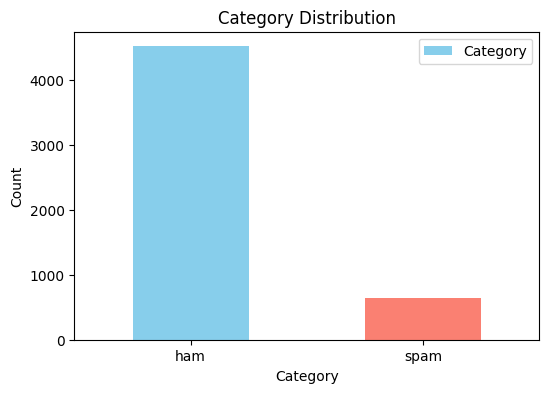

In [8]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = df['Category'].value_counts()

# Create a bar plot
%matplotlib inline
plt.figure(figsize=(6,4))
category_counts.plot(kind='bar', color=['skyblue', 'salmon'], label='Category')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend()  # Now this will show 'Category' in the legend
plt.show()

Original dataset shape: Category
ham     4516
spam     641
Name: count, dtype: int64


<Axes: title={'center': 'Resampled Category Distribution'}, xlabel='Category'>

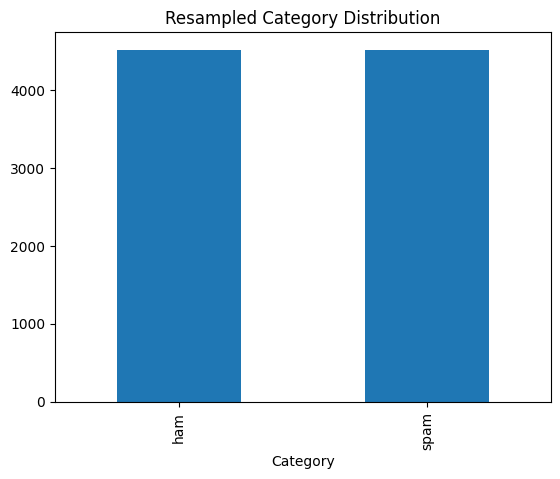

In [9]:
from imblearn.over_sampling import SMOTE

# Prepare your features (X) and labels (y)
# Use the TF-IDF matrix as X and your label column as y
X = cov_tfidv
y = df['Category']  # Make sure this is your label column

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Original dataset shape:", y.value_counts())
df_cp= pd.Series(y_resampled)
df_cp.value_counts().plot(kind='bar', title='Resampled Category Distribution')
# Use X_resampled and y_resampled for model training

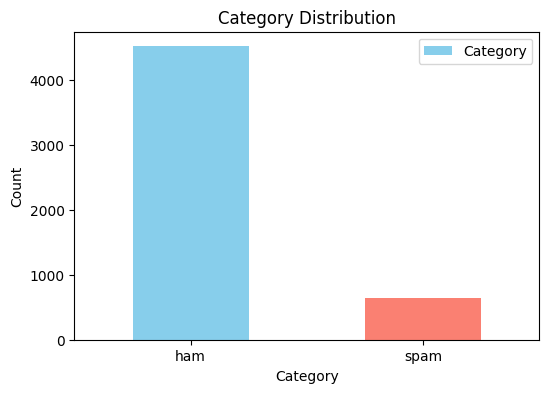

In [10]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = df['Category'].value_counts()

# Create a bar plot
%matplotlib inline
plt.figure(figsize=(6,4))
category_counts.plot(kind='bar', color=['skyblue', 'salmon'], label='Category')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend()  # Now this will show 'Category' in the legend
plt.show()